# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Import dependencies

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import requests
from api_keys import weather_api_key
from scipy.stats import linregress

### Import API Keys

## Generate Cities List

Generate a list of unique cities based on a random latitude and longitude and using citypy library. A while loop enforces the that the requested number of cities will be generated. It is need because some coordinates generated when used as input for citypy library does not get a valide return.

In [2]:
# Size of the list of cities
num_cities = 1000
latitude_max = 90
longitude_max = 180

cities_list = []
country_list = []
lat_list = []
lng_list = []


while len(cities_list) < num_cities:
    
    # Generate a random latitude using numpy random array multiplied by 90 that is the maximum for latitude
    # and multiple by a random +1 or -1 to give the North or South from Equator
    lat_random = ((latitude_max*np.random.rand(1,1))*(np.random.randint(2, size=1)*2-1))

    # Generate a random longitude using numpy random array multiplied by 180 that is the maximum for longitude
    # and multiple by a random +1 or -1 to give the East or West from Greenwich
    lon_random = ((longitude_max*np.random.rand(1,1))*(np.random.randint(2, size=1)*2-1))

    # Create a list of cities based on the random coordinates and using the citypy library
    city = citipy.nearest_city(lat_random[0][0], lon_random[0][0])
    new_city = city.city_name.title()
    new_city_country = city.country_code.upper()
    

    # Logical test to verify if the city is already include in the list or not
    if new_city not in cities_list:
        cities_list.append(new_city)
        country_list.append(new_city_country)
        lat_list.append(lat_random[0][0])
        lng_list.append(lon_random[0][0])

        
print(f'List of cities has {len(cities_list)} cities.')

List of cities has 1000 cities.


In [3]:
# Create a dataframe with the random latitude and longitude

cities_df = pd.DataFrame({'City':cities_list,
                          'Lat':lat_list,
                          'Lng':lng_list,
                          'Max Temp':'',
                          'Humidity':'',
                          'Cloudiness':'',
                          'Wind Speed':'',
                          'Country':country_list,
                          'Date':''})

cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mnogovershinnyy,53.193503,138.610863,,,,,RU,
1,Tessalit,20.095987,0.563284,,,,,ML,
2,Taolanaro,-83.868866,67.490765,,,,,MG,
3,Nabire,-2.527854,136.605715,,,,,ID,
4,Bathsheba,15.464106,-56.585267,,,,,BB,
...,...,...,...,...,...,...,...,...,...
995,Gerede,40.421445,32.472146,,,,,TR,
996,Alice Springs,-21.856799,131.372059,,,,,AU,
997,Sarh,8.838678,18.037707,,,,,TD,
998,Jimo,36.078876,121.442686,,,,,CN,


In [4]:
# Double check if the list only has unique cities
print(f"The list of cities has {len(cities_df['City'].unique())} unique cities.")


The list of cities has 1000 unique cities.


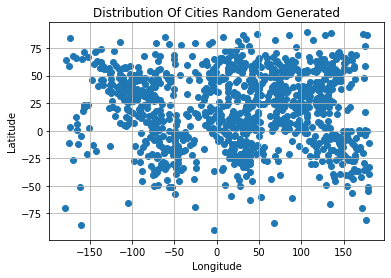

In [5]:
# Generate a scatterplot of the random coordinates.
# Note that coordinates looks to be evenly distributed.
# since the numpy random number distribution has uniform distribution

plt.scatter(x=cities_df['Lng'], y=cities_df['Lat'])
plt.title('distribution of cities random generated'.title())
plt.xlabel('Longitude')
plt.ylabel('Latitude');
plt.grid(True)

Observation: note that due to the nature of the random coordinates (Latitude, Longitude) genaration and the use of citypy to retrieve the name of the nearest city, it is possible to note in the following map that the coordinates sometimes are far from the real city location. 

In [40]:
# Plot the random generated coordinates in the global map
import plotly.express as px
fig = px.scatter_geo(cities_df, lat="Lat", lon="Lng", hover_name="City", projection="natural earth")
fig.show()
plt.savefig('data/Fig_0_Map.png')

<Figure size 432x288 with 0 Axes>

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# set up lists to hold reponse info
hum = []
max_temp = []
cloudiness = []
wind_speed = []
time_data_calculation = []
n = 1

# Loop through the list of cities and perform a request for data on each
for city in cities_df['City']:
    response = requests.get(query_url + city).json()


    # Handle exception in case of city data not available in the API
    try:
        print(f"Processing Record {n} of {len(cities_df['City'])} | {city}")
        hum.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        time_data_calculation.append(response['dt'])
    except KeyError:
        print(f"City {city} not found. Skipping...")
        hum.append(np.nan)
        max_temp.append(np.nan)
        cloudiness.append(np.nan)
        wind_speed.append(np.nan)
        time_data_calculation.append(np.nan)
    
    n += 1

    
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Processing Record 1 of 1000 | Mnogovershinnyy
Processing Record 2 of 1000 | Tessalit
Processing Record 3 of 1000 | Taolanaro
City Taolanaro not found. Skipping...
Processing Record 4 of 1000 | Nabire
Processing Record 5 of 1000 | Bathsheba
Processing Record 6 of 1000 | Ushuaia
Processing Record 7 of 1000 | Zhangzhou
Processing Record 8 of 1000 | Kutum
Processing Record 9 of 1000 | New Norfolk
Processing Record 10 of 1000 | Petropavlovsk-Kamchatskiy
Processing Record 11 of 1000 | Ribeira Grande
Processing Record 12 of 1000 | Punta Arenas
Processing Record 13 of 1000 | Najran
Processing Record 14 of 1000 | Norman Wells
Processing Record 15 of 1000 | Hasaki
Processing Record 16 of 1000 | Laguna
Processing Record 17 of 1000 | Paamiut
Processing Record 18 of 1000 | Olinda
Processing Record 19 of 1000 | Campbell River
Processing Record 20 of 1000 | Puerto Ayora
Processing Record 21 of 1000 | Macaboboni
City Macaboboni not found. Skipping...
Processing Record 22 of 1000 | Nikolskoye
Processin

Processing Record 186 of 1000 | Nizhneyansk
City Nizhneyansk not found. Skipping...
Processing Record 187 of 1000 | Crixas
Processing Record 188 of 1000 | Hobart
Processing Record 189 of 1000 | Lagoa
Processing Record 190 of 1000 | Taoudenni
Processing Record 191 of 1000 | Nago
Processing Record 192 of 1000 | Maltahohe
Processing Record 193 of 1000 | Warmbad
Processing Record 194 of 1000 | Saint-Philippe
Processing Record 195 of 1000 | Mchinji
Processing Record 196 of 1000 | Kuche
City Kuche not found. Skipping...
Processing Record 197 of 1000 | Teguise
Processing Record 198 of 1000 | Diapaga
Processing Record 199 of 1000 | Mar Del Plata
Processing Record 200 of 1000 | Namatanai
Processing Record 201 of 1000 | Barrow
Processing Record 202 of 1000 | Bethel
Processing Record 203 of 1000 | Beverley
Processing Record 204 of 1000 | Byron Bay
Processing Record 205 of 1000 | Maceio
Processing Record 206 of 1000 | Patrasaer
Processing Record 207 of 1000 | Ahmadpur
Processing Record 208 of 1000

Processing Record 368 of 1000 | Kaihua
Processing Record 369 of 1000 | Quelimane
Processing Record 370 of 1000 | La Orilla
Processing Record 371 of 1000 | Aketi
Processing Record 372 of 1000 | Zarinsk
Processing Record 373 of 1000 | Vila
Processing Record 374 of 1000 | Casablanca
Processing Record 375 of 1000 | Sibolga
Processing Record 376 of 1000 | Pisco
Processing Record 377 of 1000 | Zhigansk
Processing Record 378 of 1000 | Jumla
Processing Record 379 of 1000 | Salalah
Processing Record 380 of 1000 | Morant Bay
Processing Record 381 of 1000 | Ulladulla
Processing Record 382 of 1000 | Dhidhdhoo
Processing Record 383 of 1000 | Tak
Processing Record 384 of 1000 | Krutikha
Processing Record 385 of 1000 | Klaksvik
Processing Record 386 of 1000 | Tahoua
Processing Record 387 of 1000 | Bandar-E Anzali
Processing Record 388 of 1000 | Ambanja
Processing Record 389 of 1000 | Stonewall
Processing Record 390 of 1000 | Moose Factory
Processing Record 391 of 1000 | Myitkyina
Processing Record 39

Processing Record 554 of 1000 | Kurinjippadi
Processing Record 555 of 1000 | Pokrovsk
Processing Record 556 of 1000 | Yei
Processing Record 557 of 1000 | Iwanai
Processing Record 558 of 1000 | Zlobin
Processing Record 559 of 1000 | Sept-Iles
Processing Record 560 of 1000 | Harper
Processing Record 561 of 1000 | Superior
Processing Record 562 of 1000 | Mogadishu
Processing Record 563 of 1000 | Muncar
Processing Record 564 of 1000 | Hofn
Processing Record 565 of 1000 | Mayo
Processing Record 566 of 1000 | Kawana Waters
City Kawana Waters not found. Skipping...
Processing Record 567 of 1000 | Samalaeulu
City Samalaeulu not found. Skipping...
Processing Record 568 of 1000 | Amderma
City Amderma not found. Skipping...
Processing Record 569 of 1000 | Chernyshevskiy
Processing Record 570 of 1000 | Hibbing
Processing Record 571 of 1000 | Zeya
Processing Record 572 of 1000 | Santiago Del Estero
Processing Record 573 of 1000 | Pacifica
Processing Record 574 of 1000 | San Matias
Processing Record

Processing Record 740 of 1000 | Herat
Processing Record 741 of 1000 | Jacareacanga
Processing Record 742 of 1000 | Walvis Bay
Processing Record 743 of 1000 | Xai-Xai
Processing Record 744 of 1000 | Qandala
Processing Record 745 of 1000 | North Platte
Processing Record 746 of 1000 | Trofors
Processing Record 747 of 1000 | Chimoio
Processing Record 748 of 1000 | Dezful
Processing Record 749 of 1000 | Dingli
Processing Record 750 of 1000 | Dodge City
Processing Record 751 of 1000 | Sunrise Manor
Processing Record 752 of 1000 | Smithers
Processing Record 753 of 1000 | Tongsa
City Tongsa not found. Skipping...
Processing Record 754 of 1000 | Hamirpur
Processing Record 755 of 1000 | Wuda
Processing Record 756 of 1000 | Srandakan
Processing Record 757 of 1000 | Aykhal
Processing Record 758 of 1000 | Wawa
Processing Record 759 of 1000 | Dongsheng
Processing Record 760 of 1000 | Gayeri
Processing Record 761 of 1000 | Chardara
Processing Record 762 of 1000 | Thinadhoo
Processing Record 763 of 10

Processing Record 921 of 1000 | Guhagar
Processing Record 922 of 1000 | High Prairie
Processing Record 923 of 1000 | Tabuk
Processing Record 924 of 1000 | Ambodifototra
City Ambodifototra not found. Skipping...
Processing Record 925 of 1000 | Payo
Processing Record 926 of 1000 | Kyzyl-Suu
Processing Record 927 of 1000 | Bikaner
Processing Record 928 of 1000 | Mersing
Processing Record 929 of 1000 | Deder
Processing Record 930 of 1000 | Berdigestyakh
Processing Record 931 of 1000 | Huilong
Processing Record 932 of 1000 | Jacqueville
Processing Record 933 of 1000 | Mweka
Processing Record 934 of 1000 | Cassino
Processing Record 935 of 1000 | Yelatma
Processing Record 936 of 1000 | Progreso
Processing Record 937 of 1000 | Lawar
City Lawar not found. Skipping...
Processing Record 938 of 1000 | La Rioja
Processing Record 939 of 1000 | Poronaysk
Processing Record 940 of 1000 | Araouane
Processing Record 941 of 1000 | Langsa
Processing Record 942 of 1000 | Terrace
Processing Record 943 of 100

In [8]:
# Update the dataframe with the data colected from the API for Max Temp, Humidity, Cloudiness, Wind Speed, Date
cities_df['Max Temp'] = max_temp
cities_df['Humidity'] = hum
cities_df['Cloudiness'] = cloudiness
cities_df['Wind Speed'] = wind_speed
cities_df['Date'] = time_data_calculation

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
cities_df.to_csv('data/city_weather.csv')

In [10]:
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mnogovershinnyy,53.193503,138.610863,41.88,81.0,0.0,1.10,RU,1.599930e+09
1,Tessalit,20.095987,0.563284,105.24,8.0,49.0,4.92,ML,1.599930e+09
2,Taolanaro,-83.868866,67.490765,NaN,NaN,NaN,NaN,MG,NaN
3,Nabire,-2.527854,136.605715,76.37,91.0,96.0,5.39,ID,1.599930e+09
4,Bathsheba,15.464106,-56.585267,89.60,62.0,20.0,10.29,BB,1.599930e+09
...,...,...,...,...,...,...,...,...,...
995,Gerede,40.421445,32.472146,63.81,72.0,62.0,4.92,TR,1.599931e+09
996,Alice Springs,-21.856799,131.372059,60.80,21.0,0.0,2.95,AU,1.599930e+09
997,Sarh,8.838678,18.037707,80.60,78.0,20.0,2.24,TD,1.599931e+09
998,Jimo,36.078876,121.442686,70.00,94.0,20.0,4.47,CN,1.599931e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
filter_hum = cities_df['Humidity'].loc[cities_df['Humidity'] > 100]
filter_hum

Series([], Name: Humidity, dtype: float64)

In [12]:
#  Get the indices of cities that have humidity over 100%.
indexes_hum = filter_hum.keys()
indexes_hum

Int64Index([], dtype='int64')

In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_df
clean_city_data.drop(clean_city_data.iloc[indexes_hum].index, inplace=True)

In this step, we clean the dataframe by dropping the `NA` values inserted before due to the API does not contain data for those cities.

In [14]:
# Drop NA values inserted to handle missing values
clean_city_data.dropna(inplace=True)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mnogovershinnyy,53.193503,138.610863,41.88,81.0,0.0,1.10,RU,1.599930e+09
1,Tessalit,20.095987,0.563284,105.24,8.0,49.0,4.92,ML,1.599930e+09
3,Nabire,-2.527854,136.605715,76.37,91.0,96.0,5.39,ID,1.599930e+09
4,Bathsheba,15.464106,-56.585267,89.60,62.0,20.0,10.29,BB,1.599930e+09
5,Ushuaia,-57.764549,-49.477337,39.20,80.0,40.0,5.82,AR,1.599930e+09
...,...,...,...,...,...,...,...,...,...
995,Gerede,40.421445,32.472146,63.81,72.0,62.0,4.92,TR,1.599931e+09
996,Alice Springs,-21.856799,131.372059,60.80,21.0,0.0,2.95,AU,1.599930e+09
997,Sarh,8.838678,18.037707,80.60,78.0,20.0,2.24,TD,1.599931e+09
998,Jimo,36.078876,121.442686,70.00,94.0,20.0,4.47,CN,1.599931e+09


In [15]:
# The cleaned data set will contain the following number of cities
print(f"The final data set contains {len(clean_city_data)} cities.")

The final data set contains 912 cities.


In [16]:
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,9.120000e+02
mean,19.344429,19.796495,69.417917,67.105263,47.541667,7.472434,1.599930e+09
std,34.037082,89.943360,15.950337,23.522274,36.949938,5.093617,2.000956e+02
min,-89.870958,-179.878932,28.620000,3.000000,0.000000,0.180000,1.599930e+09
25%,-6.677940,-60.678354,55.990000,53.000000,9.750000,3.530000,1.599930e+09
50%,22.761960,25.646777,71.600000,74.000000,40.000000,6.310000,1.599930e+09
75%,46.448554,96.445421,80.600000,85.000000,84.000000,10.290000,1.599930e+09
max,89.305618,179.950108,109.710000,100.000000,100.000000,32.280000,1.599931e+09


In [17]:
# Convert the time_data_calculation
date_rec = pd.to_datetime(clean_city_data['Date'], unit='s')
print(f"The last measure data is from {str(date_rec[0])[:-9]}.")


The last measure data is from 2020-09-12.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

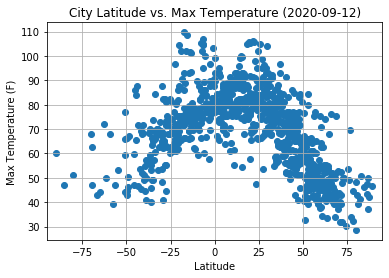

In [18]:
# Plot Latitude vs. Temperature
plt.grid(True)
plt.scatter(x=clean_city_data['Lat'], y=cities_df['Max Temp'])
plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs. Max Temperature ({str(date_rec[0])[:-9]})");
plt.xlim([-95,95])
plt.savefig('data/Fig_1_Lat_vs_Temp.png')

## Latitude vs. Humidity Plot

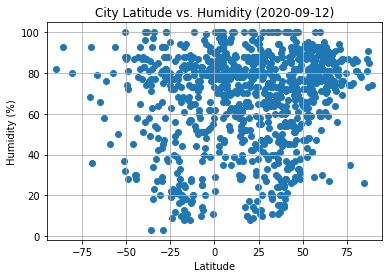

In [19]:
# Plot Latitude vs. Humidity
plt.scatter(x=clean_city_data['Lat'], y=cities_df['Humidity'])
plt.grid(True)
plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity ({str(date_rec[0])[:-9]})");
plt.xlim([-95,95])
plt.savefig('data/Fig_2_Lat_vs_Hum.png')

## Latitude vs. Cloudiness Plot

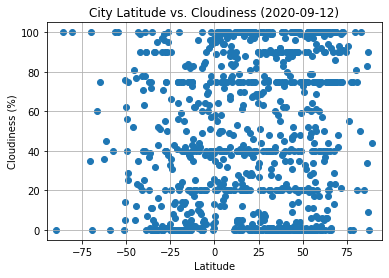

In [20]:
# Plot Latitude vs. Humidity
plt.scatter(x=clean_city_data['Lat'], y=cities_df['Cloudiness'])
plt.grid(True)
plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness ({str(date_rec[0])[:-9]})");
plt.xlim([-95,95])
plt.savefig('data/Fig_3_Lat_vs_Cloudiness.png')

## Latitude vs. Wind Speed Plot

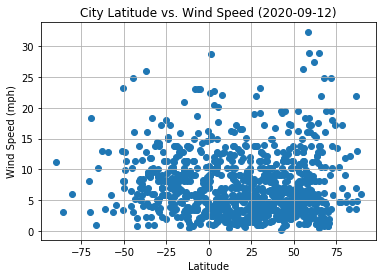

In [21]:
# Plot Latitude vs. Humidity
plt.scatter(x=clean_city_data['Lat'], y=cities_df['Wind Speed'])
plt.grid(True)
plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs. Wind Speed ({str(date_rec[0])[:-9]})");
plt.savefig('data/Fig_4_Lat_vs_Wind.png')

## Linear Regression

In [22]:
north_hem_pct = round(100*len(clean_city_data['Lat'].loc[clean_city_data['Lat']>=0])/len(clean_city_data['Lat']),2)
south_hem_pct = round(100*len(clean_city_data['Lat'].loc[clean_city_data['Lat']<0])/len(clean_city_data['Lat']),2)
print(f"Northern Hemisphere cities: {north_hem_pct}% | Southern Hemisphere cities: {south_hem_pct}%")

Northern Hemisphere cities: 70.83% | Southern Hemisphere cities: 29.17%


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [23]:
x_values = np.array(clean_city_data['Lat'].loc[clean_city_data['Lat']>=0])
y_values = np.array(clean_city_data['Max Temp'].loc[clean_city_data['Lat']>=0])

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.5918616933292569


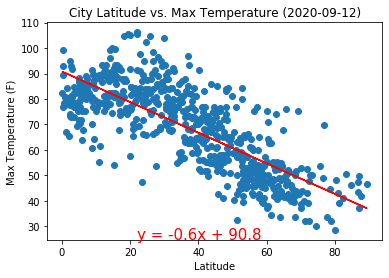

In [24]:
# plt.figure(figsize=(15,6))

plt.scatter(x=x_values, y=y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (22, 25), fontsize=15, color="red")


plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs. Max Temperature ({str(date_rec[1])[:-9]})");
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [25]:
x_values = np.array(clean_city_data['Lat'].loc[clean_city_data['Lat']<0])
y_values = np.array(clean_city_data['Max Temp'].loc[clean_city_data['Lat']<0])

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.3710110773685675


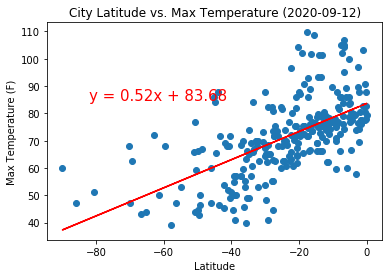

In [26]:
# plt.figure(figsize=(15,6))

plt.scatter(x=x_values, y=y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-82, 85), fontsize=15, color="red")


plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs. Max Temperature ({str(date_rec[1])[:-9]})");
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [27]:
x_values = np.array(clean_city_data['Lat'].loc[clean_city_data['Lat']>=0])
y_values = np.array(clean_city_data['Humidity'].loc[clean_city_data['Lat']>=0])

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.013038666927247122


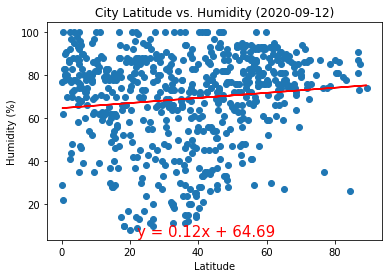

In [28]:
# plt.figure(figsize=(15,6))

plt.scatter(x=x_values, y=y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (22, 5), fontsize=15, color="red")


plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity ({str(date_rec[1])[:-9]})");
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [29]:
x_values = np.array(clean_city_data['Lat'].loc[clean_city_data['Lat']<0])
y_values = np.array(clean_city_data['Humidity'].loc[clean_city_data['Lat']<0])

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.008916314008233407


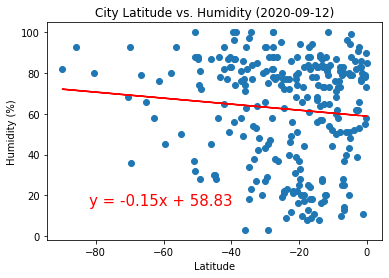

In [30]:
# plt.figure(figsize=(15,6))

plt.scatter(x=x_values, y=y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-82, 15), fontsize=15, color="red")


plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity ({str(date_rec[1])[:-9]})");
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [31]:
x_values = np.array(clean_city_data['Lat'].loc[clean_city_data['Lat']>=0])
y_values = np.array(clean_city_data['Cloudiness'].loc[clean_city_data['Lat']>=0])

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.00014259493522590563


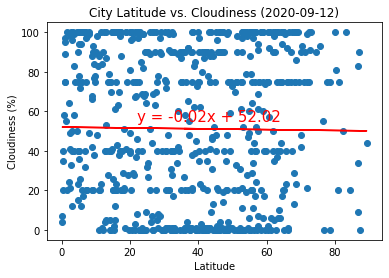

In [32]:
# plt.figure(figsize=(15,6))

plt.scatter(x=x_values, y=y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (22, 55), fontsize=15, color="red")


plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness ({str(date_rec[1])[:-9]})");
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [33]:
x_values = np.array(clean_city_data['Lat'].loc[clean_city_data['Lat']<0])
y_values = np.array(clean_city_data['Cloudiness'].loc[clean_city_data['Lat']<0])

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.00928607921339896


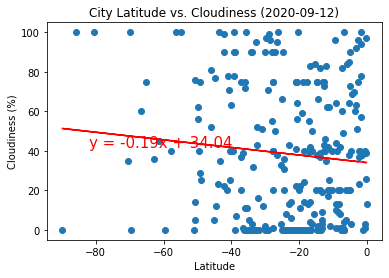

In [34]:
# plt.figure(figsize=(15,6))

plt.scatter(x=x_values, y=y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-82, 42), fontsize=15, color="red")


plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness ({str(date_rec[1])[:-9]})");
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [35]:
x_values = np.array(clean_city_data['Lat'].loc[clean_city_data['Lat']>=0])
y_values = np.array(clean_city_data['Wind Speed'].loc[clean_city_data['Lat']>=0])

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.0066914984150026275


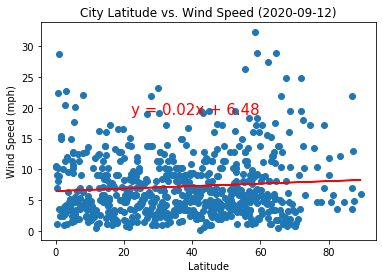

In [36]:
# plt.figure(figsize=(15,6))

plt.scatter(x=x_values, y=y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (22, 19), fontsize=15, color="red")


plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs. Wind Speed ({str(date_rec[1])[:-9]})");
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [37]:
x_values = np.array(clean_city_data['Lat'].loc[clean_city_data['Lat']<0])
y_values = np.array(clean_city_data['Wind Speed'].loc[clean_city_data['Lat']<0])

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.003671000658859328


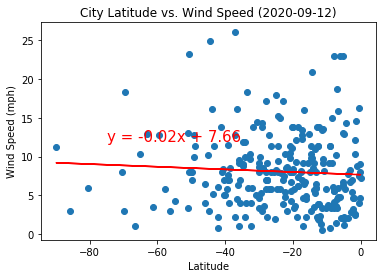

In [38]:
# plt.figure(figsize=(15,6))

plt.scatter(x=x_values, y=y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-75, 12), fontsize=15, color="red")


plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs. Wind Speed ({str(date_rec[1])[:-9]})");
print(f"The r-squared is: {rvalue**2}")
plt.show()